In [1]:
#Import du data set et des libs
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [13]:
#chargement du jeu de donnees
wine_dataframe = pd.read_csv('modified_datatest.csv', index_col=0)
print(len(wine_dataframe))
wine_dataframe = wine_dataframe.drop('URLS', axis=1)
wine_dataframe = wine_dataframe.drop('Tranquille to Mousseux', axis=1)
wine_dataframe = wine_dataframe[wine_dataframe['Red'] != 0]
wine_dataframe = wine_dataframe.drop('Red', axis=1)
print(len(wine_dataframe))

wine_dataframe['Léger to Puissant'] = wine_dataframe['Léger to Puissant'].str.replace(';', '')
wine_dataframe['Souple to Tannique'] = wine_dataframe['Souple to Tannique'].str.replace(';', '')
wine_dataframe['Sec to Moelleux'] = wine_dataframe['Sec to Moelleux'].str.replace(';', '')
wine_dataframe['Doux to Acide'] = wine_dataframe['Doux to Acide'].str.replace(';', '')
wine_dataframe['Léger to Puissant'] = wine_dataframe['Léger to Puissant'].astype(float)
wine_dataframe['Souple to Tannique'] = wine_dataframe['Souple to Tannique'].astype(float)
wine_dataframe['Sec to Moelleux'] = wine_dataframe['Sec to Moelleux'].astype(float)
wine_dataframe['Doux to Acide'] = wine_dataframe['Doux to Acide'].astype(float)
wine_dataframe = wine_dataframe.reset_index(drop=True)
wine_dataframe.head(5)

35218
23836


,Léger to Puissant,Souple to Tannique,Sec to Moelleux,Doux to Acide,Aromas,Olphactive,Cépages
0,81.506206,54.000871,35.730447,49.651155,////Boisé/Minéral & terre/Épices/Fermenté (lev...,d'évolution (vieillissement)/minéral & terre/f...,Cabernet-Sauvignon
1,80.189503,62.006638,41.037754,54.328795,////Boisé/Sous-bois/Épices/Fermenté (levuré),d'évolution (vieillissement)/sous-bois/ferment...,Cabernet-Sauvignon
2,83.372641,50.110101,31.002883,54.353158,caramel///Boisé/Sous-bois/Épices,d'évolution (vieillissement)/sous-bois/boisé/d...,Cabernet-Sauvignon
3,79.226506,53.311266,25.018468,65.731435,caramel///Boisé/Épices/Sous-bois,d'évolution (vieillissement)/sous-bois/boisé/d...,Cabernet-Sauvignon
4,79.351619,53.002333,23.593521,57.636678,caramel/graphite////Boisé/Sous-bois/Épices/Flo...,d'évolution (vieillissement)/sous-bois/boisé/d...,Cabernet-Sauvignon


In [14]:
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace('/+', '+')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace(',+', '+')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace('/+', '+')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace(',+', '+')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace('Ã©', 'é')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace('Ã‰', 'é')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace('Ã©', 'é')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace('Ã‰', 'é')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.lower()
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.lower()
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.lstrip('+')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.lstrip('+')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.split('+')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.split('+')

wine_dataframe['Aromas'] = wine_dataframe['Aromas'].apply(lambda x: [] if isinstance(x, float) else x)
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].apply(lambda x: [] if isinstance(x, float) else x)
print(wine_dataframe.describe())

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


       Léger to Puissant  Souple to Tannique  Sec to Moelleux  Doux to Acide
count       23836.000000        23836.000000     23836.000000   23836.000000
mean           38.930212           28.768611        18.152295      34.888247
std            30.922035           23.730531        14.708418      27.569384
min             0.000000            0.000000         0.000000       0.000000
25%             0.000000            0.000000         0.000000       0.000000
50%            49.257044           34.000000        22.920260      45.472399
75%            67.230315           48.071282        29.292925      58.306207
max            85.000000           85.000000        85.000000      85.000000


In [15]:
value_counts = wine_dataframe['Olphactive'].apply(lambda x: type(x).__name__).value_counts()
print(value_counts)

list    23836
Name: Olphactive, dtype: int64


In [16]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
Aromas_one_hot_encoded = mlb.fit_transform(wine_dataframe['Aromas'])
Aromas_df_encoded = pd.DataFrame(Aromas_one_hot_encoded, columns=mlb.classes_)
Olphactive_one_hot_encoded = mlb.fit_transform(wine_dataframe['Olphactive'])
Olphactive_df_encoded = pd.DataFrame(Olphactive_one_hot_encoded, columns=mlb.classes_)
df_concatenated_0 = pd.concat([wine_dataframe, Aromas_df_encoded], axis=1)
df_concatenated = pd.concat([df_concatenated_0, Olphactive_df_encoded], axis=1)

df_concatenated.drop('Aromas', axis=1, inplace=True)
df_concatenated.drop('Olphactive', axis=1, inplace=True)

# count the number of observations per variety
counts = df_concatenated['Cépages'].value_counts()

# print the counts
print(counts)

Pinot noir            8378
Cabernet-Sauvignon    8127
Merlot                3111
Malbec                1582
Sangiovese            1414
Zinfandel             1224
Name: Cépages, dtype: int64


In [17]:
for i, row in df_concatenated.iterrows():
    if row['Léger to Puissant'] == 0 and row['Souple to Tannique'] == 0 and row['Sec to Moelleux'] == 0 and row['Doux to Acide'] == 0:
        df_concatenated = df_concatenated.drop(i) 
print(df_concatenated['Cépages'].value_counts())

Pinot noir            5888
Cabernet-Sauvignon    4405
Merlot                2209
Malbec                1263
Zinfandel              940
Sangiovese             790
Name: Cépages, dtype: int64


In [18]:
from sklearn.model_selection import train_test_split
X = df_concatenated.drop('Cépages', axis=1)
y = df_concatenated['Cépages']
#X = X.values
#y = y.tolist()
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42)


In [19]:
train_merged = pd.merge(X_train, y_train, left_index=True, right_index=True, how='inner') 
train_merged_deleted = train_merged[(train_merged['Léger to Puissant'] != 0) |
                               (train_merged['Souple to Tannique'] != 0) |
                               (train_merged['Sec to Moelleux'] != 0) |
                               (train_merged['Doux to Acide'] != 0)]

means = train_merged_deleted.groupby('Cépages').mean()
for i, row in train_merged.iterrows():
    if row['Léger to Puissant'] == 0 and row['Souple to Tannique'] == 0 and row['Sec to Moelleux'] == 0 and row['Doux to Acide'] == 0:
        train_merged.loc[i, 'Léger to Puissant'] = means.loc[row['Cépages'], 'Léger to Puissant']
        train_merged.loc[i, 'Souple to Tannique'] = means.loc[row['Cépages'], 'Souple to Tannique']
        train_merged.loc[i, 'Sec to Moelleux'] = means.loc[row['Cépages'], 'Sec to Moelleux']
        train_merged.loc[i, 'Doux to Acide'] = means.loc[row['Cépages'], 'Doux to Acide']
X_train = train_merged.drop('Cépages', axis=1)
y_train = train_merged['Cépages']

test_merged = pd.merge(X_test, y_test, left_index=True, right_index=True, how='inner') 
for i, row in test_merged.iterrows():
    if row['Léger to Puissant'] == 0 and row['Souple to Tannique'] == 0 and row['Sec to Moelleux'] == 0 and row['Doux to Acide'] == 0:
        test_merged = test_merged.drop(i) 

X_test = test_merged.drop('Cépages', axis=1)
y_test = test_merged['Cépages']

X_train = X_train.values
y_train = y_train.tolist()
X_test = X_test.values
y_test = y_test.tolist()



# 2) PREDICT

In [20]:
classifier = SVC(C=100.0, kernel='rbf', degree=3, gamma='auto')
classifier.fit(X_train, y_train)
#Prediction sur le Test set
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

Cabernet-Sauvignon       0.90      0.93      0.91       460
            Malbec       0.85      0.89      0.87       127
            Merlot       0.88      0.84      0.86       214
        Pinot noir       0.98      0.96      0.97       596
        Sangiovese       0.83      0.85      0.84        65
         Zinfandel       0.86      0.86      0.86        88

          accuracy                           0.92      1550
         macro avg       0.89      0.89      0.89      1550
      weighted avg       0.92      0.92      0.92      1550



In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svm_model = SVC()
param_grid = {'C': [100, 150, 200], 'kernel': ['rbf'], 'gamma': ['auto']}

In [22]:
grid_search = GridSearchCV(svm_model, param_grid, cv=3, verbose = 4, scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .....C=100, gamma=auto, kernel=rbf;, score=0.929 total time=  13.6s
[CV 2/3] END .....C=100, gamma=auto, kernel=rbf;, score=0.927 total time=  13.4s
[CV 3/3] END .....C=100, gamma=auto, kernel=rbf;, score=0.927 total time=  13.2s
[CV 1/3] END .....C=150, gamma=auto, kernel=rbf;, score=0.927 total time=  14.6s
[CV 2/3] END .....C=150, gamma=auto, kernel=rbf;, score=0.925 total time=  14.0s
[CV 3/3] END .....C=150, gamma=auto, kernel=rbf;, score=0.924 total time=  13.9s
[CV 1/3] END .....C=200, gamma=auto, kernel=rbf;, score=0.926 total time=  14.6s
[CV 2/3] END .....C=200, gamma=auto, kernel=rbf;, score=0.922 total time=  14.5s
[CV 3/3] END .....C=200, gamma=auto, kernel=rbf;, score=0.922 total time=  14.2s


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [100, 150, 200], 'gamma': ['auto'],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=4)

In [23]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best score:  0.9277159030986125


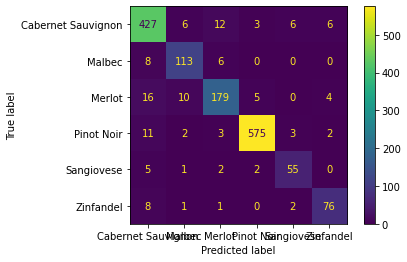

In [25]:
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Cabernet Sauvignon","Malbec","Merlot","Pinot Noir","Sangiovese","Zinfandel"])

cm_display.plot()
plt.show()